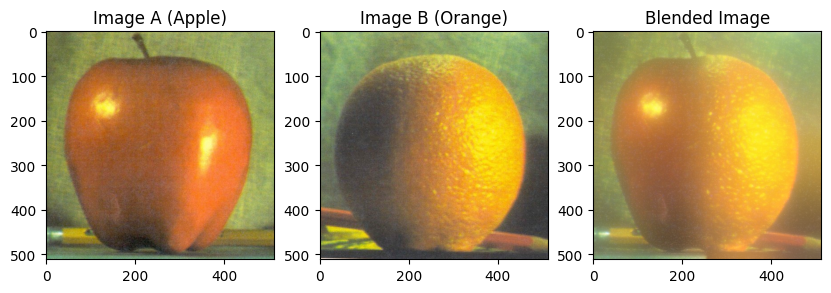

In [9]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def read_image(file_path):
    """Read an image from the specified file path."""
    image = cv.imread(file_path)
    assert image is not None, f"Failed to read the image from {file_path}"
    return image

def generate_gaussian_pyramid(image, levels=6):
    """Generate a Gaussian pyramid for the given image."""
    pyramid = [image.copy()]
    for _ in range(levels):
        image = cv.pyrDown(image)
        pyramid.append(image)
    return pyramid

def generate_laplacian_pyramid(gaussian_pyramid):
    """Generate a Laplacian pyramid for the given Gaussian pyramid."""
    laplacian_pyramid = [gaussian_pyramid[-1]]
    for i in range(len(gaussian_pyramid) - 1, 0, -1):
        expanded = cv.pyrUp(gaussian_pyramid[i])
        laplacian = cv.subtract(gaussian_pyramid[i - 1], expanded)
        laplacian_pyramid.append(laplacian)
    return laplacian_pyramid

def blend_pyramids(laplacian_pyramid1, laplacian_pyramid2):
    """Blend Laplacian pyramids of two images."""
    blended_pyramid = []
    for layer1, layer2 in zip(laplacian_pyramid1, laplacian_pyramid2):
        rows, cols, _ = layer1.shape
        blended_layer = np.hstack((layer1[:, :cols // 2], layer2[:, cols // 2:]))
        blended_pyramid.append(blended_layer)
    return blended_pyramid

def reconstruct_image(blended_pyramid):
    """Reconstruct the image from the blended Laplacian pyramid."""
    image = blended_pyramid[0]
    for layer in blended_pyramid[1:]:
        image = cv.pyrUp(image)
        image = cv.add(image, layer)
    return image

# Read input images
image1 = read_image('apple.jpg')
image2 = read_image('orange.jpg')

# Generate Gaussian pyramids for both images
gaussian_pyramid1 = generate_gaussian_pyramid(image1)
gaussian_pyramid2 = generate_gaussian_pyramid(image2)

# Generate Laplacian pyramids for both images
laplacian_pyramid1 = generate_laplacian_pyramid(gaussian_pyramid1)
laplacian_pyramid2 = generate_laplacian_pyramid(gaussian_pyramid2)

# Blend the Laplacian pyramids
blended_pyramid = blend_pyramids(laplacian_pyramid1, laplacian_pyramid2)

# Reconstruct the blended image
blended_image = reconstruct_image(blended_pyramid)

# Display the original images and the blended image
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(cv.cvtColor(image1, cv.COLOR_BGR2RGB))
plt.title('Image A (Apple)')

plt.subplot(1, 3, 2)
plt.imshow(cv.cvtColor(image2, cv.COLOR_BGR2RGB))
plt.title('Image B (Orange)')

plt.subplot(1, 3, 3)
plt.imshow(cv.cvtColor(blended_image, cv.COLOR_BGR2RGB))
plt.title('Blended Image')

plt.show()
